### Load model
- Catboost
loaded_cat = CatBoostRegressor()
loaded_cat.load_model("catboost_model.cbm")

- XGBoost
loaded_xgbr = XGBRegressor()
loaded_xgbr.load_model("xgboost_model.json")

- LightGBM
import lightgbm as lgb
loaded_lgbmr = lgb.Booster(model_file="lightgbm_model.txt")



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
#import pygwalker as pyg

train = pd.read_csv("Data/processed_data.csv")
train.head()

brand       price  old  new                          cpu cpu_brand  \
0    Asus  26990000.0    0    1      Intel Core Ultra 5 125H     Intel   
1  Lenovo  16390000.0    0    1             AMD Ryzen 77730U       AMD   
2    Asus  28990000.0    0    1      Intel Core Ultra 5 125H     Intel   
3      LG  36290000.0    0    1      Intel Core Ultra 5 125H     Intel   
4    Dell  18990000.0    0    1  Intel Core 5 processor 120U     Intel   

   ram_capacity ram_brand hard_drive_type  hard_drive_capacity  \
0          16.0      DDR5             SSD                512.0   
1          16.0      DDR4             SSD                512.0   
2          16.0      DDR5             SSD                512.0   
3          16.0      DDR5             SSD                512.0   
4           8.0      DDR5             SSD                512.0   

                  card card_brand  screen_size screen_type  
0   Intel Arc Graphics      Intel         14.0        OLED  
1  AMD Radeon Graphics        AMD         15.6          HD  
2   Intel Arc Graphics      Intel         14.0        OLED  
3   Intel Arc Graphics      Intel         14.0         IPS  
4       Intel Graphics      Intel         14.0          HD

In [38]:
unique_brands = train['cpu_brand'].unique()
print(unique_brands)

['Intel' 'AMD' 'Qualcomm' 'Apple' nan]


In [39]:
brand_counts = train['cpu_brand'].value_counts()
print(brand_counts)

cpu_brand
Intel       1833
AMD          293
Apple         35
Qualcomm      16
Name: count, dtype: int64


In [40]:
train.columns

Index(['brand', 'price', 'old', 'new', 'cpu', 'cpu_brand', 'ram_capacity',
       'ram_brand', 'hard_drive_type', 'hard_drive_capacity', 'card',
       'card_brand', 'screen_size', 'screen_type'],
      dtype='object')

In [41]:
cat_cols = ['brand', 'cpu', 'cpu_brand', 
       'ram_brand', 'hard_drive_type', 'card',
       'card_brand', 'screen_type']

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2176 non-null   object 
 1   price                2108 non-null   float64
 2   old                  2179 non-null   int64  
 3   new                  2179 non-null   int64  
 4   cpu                  2170 non-null   object 
 5   cpu_brand            2177 non-null   object 
 6   ram_capacity         2175 non-null   float64
 7   ram_brand            2063 non-null   object 
 8   hard_drive_type      2179 non-null   object 
 9   hard_drive_capacity  2121 non-null   float64
 10  card                 2169 non-null   object 
 11  card_brand           2115 non-null   object 
 12  screen_size          2146 non-null   float64
 13  screen_type          2064 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 238.5+ KB


In [43]:
ram_counts = train['ram_brand'].value_counts()
print(ram_counts)

ram_brand
DDR5       1131
DDR4        591
LPDDR5      161
LPDDR5X     121
LPDDR4X      36
LPDDR4       11
LPDDR3       11
LDDR4         1
Name: count, dtype: int64


In [44]:
print('trainframe encoded by OHE dimension : ', pd.get_dummies(train, columns = cat_cols, drop_first = True).shape)

trainframe encoded by OHE dimension :  (2179, 576)


In [45]:
# train[cat_cols] = train[cat_cols].fillna('missing')
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2176 non-null   object 
 1   price                2108 non-null   float64
 2   old                  2179 non-null   int64  
 3   new                  2179 non-null   int64  
 4   cpu                  2170 non-null   object 
 5   cpu_brand            2177 non-null   object 
 6   ram_capacity         2175 non-null   float64
 7   ram_brand            2063 non-null   object 
 8   hard_drive_type      2179 non-null   object 
 9   hard_drive_capacity  2121 non-null   float64
 10  card                 2169 non-null   object 
 11  card_brand           2115 non-null   object 
 12  screen_size          2146 non-null   float64
 13  screen_type          2064 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 238.5+ KB


In [46]:
en = LabelEncoder()

for cols in cat_cols:
    train[cols] = en.fit_transform(train[cols])

print('Dataframe encoded by Label encoding dimension : ', train.shape)

Dataframe encoded by Label encoding dimension :  (2179, 14)


In [47]:
train.head()

brand       price  old  new  cpu  cpu_brand  ram_capacity  ram_brand  \
0      1  26990000.0    0    1  104          2          16.0          1   
1      6  16390000.0    0    1   46          0          16.0          0   
2      1  28990000.0    0    1  104          2          16.0          1   
3      5  36290000.0    0    1  104          2          16.0          1   
4      2  18990000.0    0    1   97          2           8.0          1   

   hard_drive_type  hard_drive_capacity  card  card_brand  screen_size  \
0                0                512.0    44           2         14.0   
1                0                512.0    13           0         15.6   
2                0                512.0    44           2         14.0   
3                0                512.0    44           2         14.0   
4                0                512.0    47           2         14.0   

   screen_type  
0           14  
1           12  
2           14  
3           13  
4           12

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2179 non-null   int64  
 1   price                2108 non-null   float64
 2   old                  2179 non-null   int64  
 3   new                  2179 non-null   int64  
 4   cpu                  2179 non-null   int64  
 5   cpu_brand            2179 non-null   int64  
 6   ram_capacity         2175 non-null   float64
 7   ram_brand            2179 non-null   int64  
 8   hard_drive_type      2179 non-null   int64  
 9   hard_drive_capacity  2121 non-null   float64
 10  card                 2179 non-null   int64  
 11  card_brand           2179 non-null   int64  
 12  screen_size          2146 non-null   float64
 13  screen_type          2179 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 238.5 KB


In [49]:
print(train['price'].describe())

count    2.108000e+03
mean     3.013708e+07
std      1.741148e+07
min      6.990000e+06
25%      1.876500e+07
50%      2.499000e+07
75%      3.556500e+07
max      1.489900e+08
Name: price, dtype: float64


In [50]:
print("Max value in y_train:", train.max())
print("Min value in y_train:", train.min())


Max value in y_train: brand                         10.0
price                  148990000.0
old                            1.0
new                            1.0
cpu                          344.0
cpu_brand                      4.0
ram_capacity                 512.0
ram_brand                      8.0
hard_drive_type                0.0
hard_drive_capacity         4096.0
card                         186.0
card_brand                     5.0
screen_size                   18.0
screen_type                   20.0
dtype: float64
Min value in y_train: brand                        0.0
price                  6990000.0
old                          0.0
new                          0.0
cpu                          0.0
cpu_brand                    0.0
ram_capacity                 4.0
ram_brand                    0.0
hard_drive_type              0.0
hard_drive_capacity        128.0
card                         0.0
card_brand                   0.0
screen_size                 10.5
screen_type           

In [51]:
def clean_price_data(df):
    # Remove any potential negative prices
    df = df[df['price'] > 0]
    
    # Remove extreme outliers using IQR method
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
    
    return df

In [52]:
train = clean_price_data(train)

In [53]:
X = train.drop('price', axis = 1)
y = train['price']

In [54]:
print(X.shape)
print(y.shape)

(2068, 13)
(2068,)


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.05,random_state=0)

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1964, 13)
(1964,)
(104, 13)
(104,)


## Training


In [57]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [58]:
xgboost_model = XGBRegressor()
lgbm_model = LGBMRegressor()
catboost_model = CatBoostRegressor(cat_features=cat_cols, verbose=0)

In [59]:
param_grid_catboost = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# Perform grid search for CatBoost
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost, cv=3, scoring='r2', verbose=1)
grid_search_catboost.fit(X_train, y_train)
best_params_catboost = grid_search_catboost.best_params_
print(f"Best parameters for CatBoost: {best_params_catboost}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for CatBoost: {'depth': 8, 'iterations': 300, 'l2_leaf_reg': 7, 'learning_rate': 0.1}


In [60]:
param_grid_xgboost = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0, 0.1, 0.5, 1]
}

# Perform grid search for XGBoost
grid_search_xgboost = GridSearchCV(estimator=xgboost_model, param_grid=param_grid_xgboost, cv=3, scoring='r2', verbose=1)
grid_search_xgboost.fit(X_train, y_train)
best_params_xgboost = grid_search_xgboost.best_params_
print(f"Best parameters for XGBoost: {best_params_xgboost}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 1}


In [61]:
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0, 0.1, 0.5, 1]
}

# Perform grid search for LightGBM
grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid_lgbm, cv=3, scoring='r2', verbose=1)
grid_search_lgbm.fit(X_train, y_train)
best_params_lgbm = grid_search_lgbm.best_params_
print(f"Best parameters for LightGBM: {best_params_lgbm}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1309, number of used features: 12
[LightGBM] [Info] Start training from score 28837797.555386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [62]:
catboost_model.set_params(**best_params_catboost)
xgboost_model.set_params(**best_params_xgboost)
lgbm_model.set_params(**best_params_lgbm)

LGBMRegressor(max_depth=8, n_estimators=300, reg_alpha=0.1)

In [63]:
catboost_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 1964, number of used features: 12
[LightGBM] [Info] Start training from score 28711217.922607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMRegressor(max_depth=8, n_estimators=300, reg_alpha=0.1)

In [64]:
catboost_score = catboost_model.score(X_test, y_test)
print(f"CatBoost R2 score: {catboost_score}")

CatBoost R2 score: 0.8330867018414451


In [65]:
xgboost_score = xgboost_model.score(X_test, y_test)
print(f"XGBoost R2 score: {xgboost_score}")

XGBoost R2 score: 0.8300338234904686


In [66]:
lgbm_score = lgbm_model.score(X_test, y_test)
print(f"LightGBM R2 score: {lgbm_score}")

LightGBM R2 score: 0.8433380700740575


In [67]:
catboost_train_score = catboost_model.score(X_train, y_train)
xgboost_train_score = xgboost_model.score(X_train, y_train)
lgbm_train_score = lgbm_model.score(X_train, y_train)
print(f"CatBoost R2 score on training set: {catboost_train_score}")
print(f"XGBoost R2 score on training set: {xgboost_train_score}")
print(f"LightGBM R2 score on training set: {lgbm_train_score}")

CatBoost R2 score on training set: 0.8864692994016232
XGBoost R2 score on training set: 0.9286364284760817
LightGBM R2 score on training set: 0.9441209160729104


In [68]:
catboost_model.save_model("model/catboost_model.cbm")
lgbm_model.booster_.save_model("model/lightgbm_model.txt")
xgboost_model.save_model("model/xgboost_model.json")

In [69]:
loaded_cat = CatBoostRegressor()
loaded_cat.load_model("model/catboost_model.cbm")

loaded_xgbr = XGBRegressor()
loaded_xgbr.load_model("model/xgboost_model.json")

import lightgbm as lgb
loaded_lgbmr = lgb.Booster(model_file="model/lightgbm_model.txt")

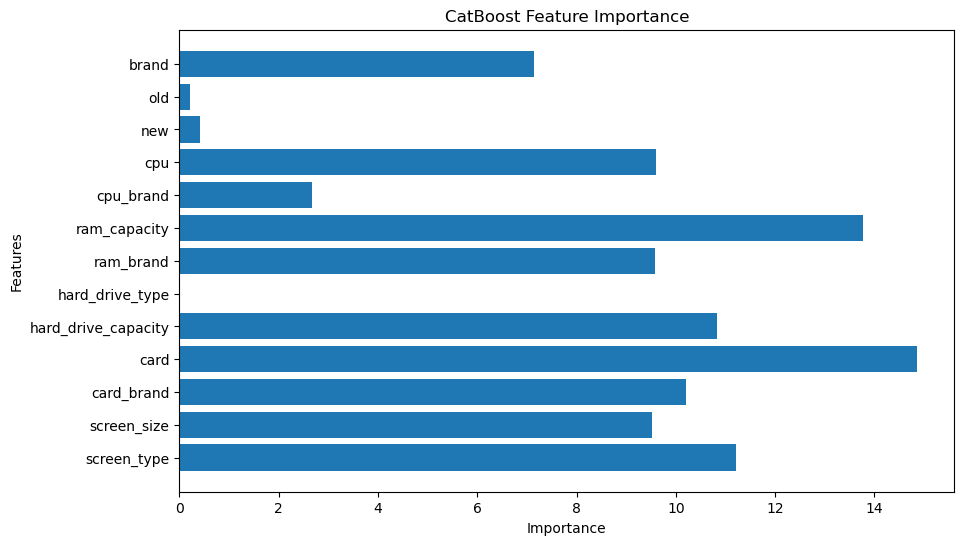

In [70]:
# Get feature importance
cat_feature_importance = loaded_cat.get_feature_importance()
cat_feature_names = loaded_cat.feature_names_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(cat_feature_names, cat_feature_importance)
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

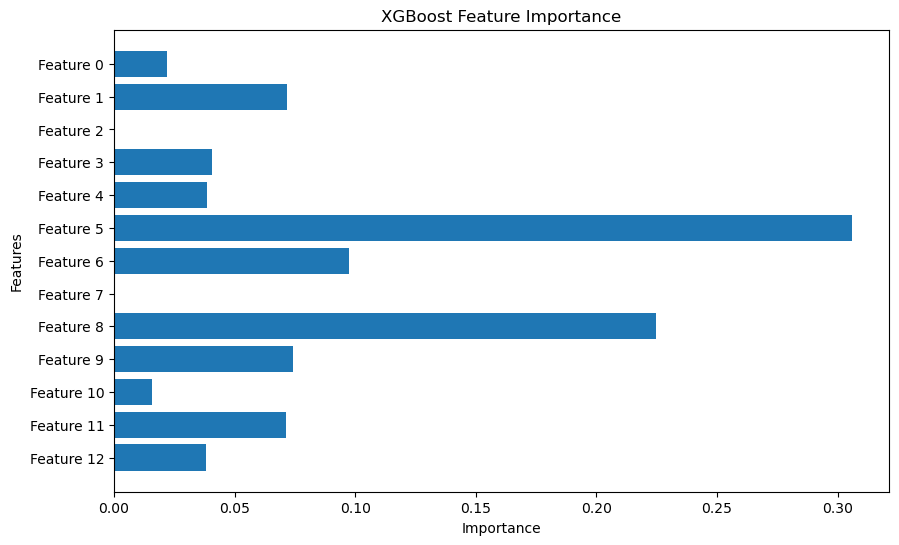

In [71]:
# Get feature importance
xgb_feature_importance = loaded_xgbr.feature_importances_
xgb_feature_names = [f"Feature {i}" for i in range(len(xgb_feature_importance))]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_names, xgb_feature_importance)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

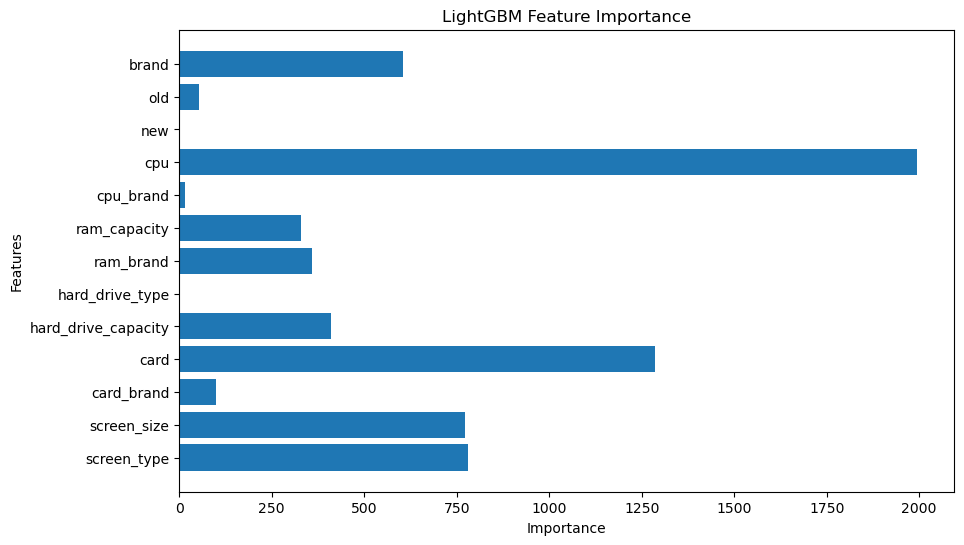

In [72]:
# Get feature importance
lgb_feature_importance = loaded_lgbmr.feature_importance(importance_type="split")
lgb_feature_names = loaded_lgbmr.feature_name()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(lgb_feature_names, lgb_feature_importance)
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()